## Chargement et préparation des données


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from scripts.features.processing import filter_and_analyze_dataset
from scripts.visualization.data_quality_viz import plot_data_quality_dashboard
from scripts.features.selection import analyze_and_select_features
from scripts.data.analysis import analyze_data_quality

df = pd.read_csv('../data/en.openfoodfacts.org.products.csv', 
                 sep='\t',
                 encoding='utf-8',
                 low_memory=False,
                 on_bad_lines='skip',
                 nrows=300000)

Module de visualisation non disponible
Colonnes numériques : 14
Colonnes ordinales : 1
Colonnes nominales : 1
Colonnes supprimées : 190
Colonnes optimisées : 3

Variables supprimées pour cause de forte corrélation:
- sodium_100g
- energy_100g


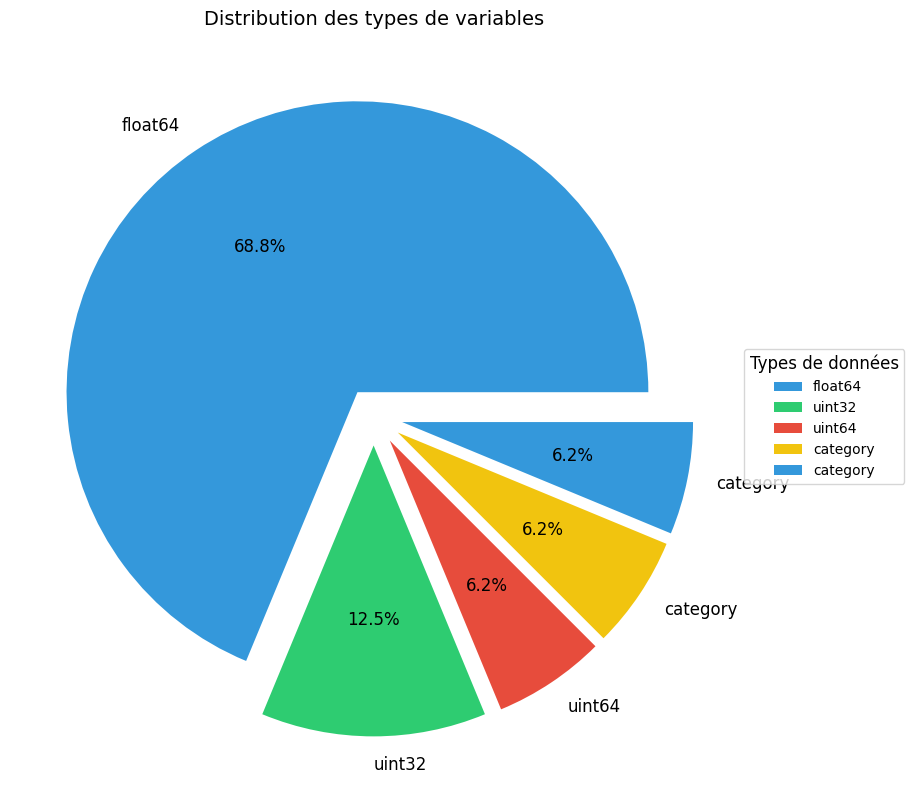

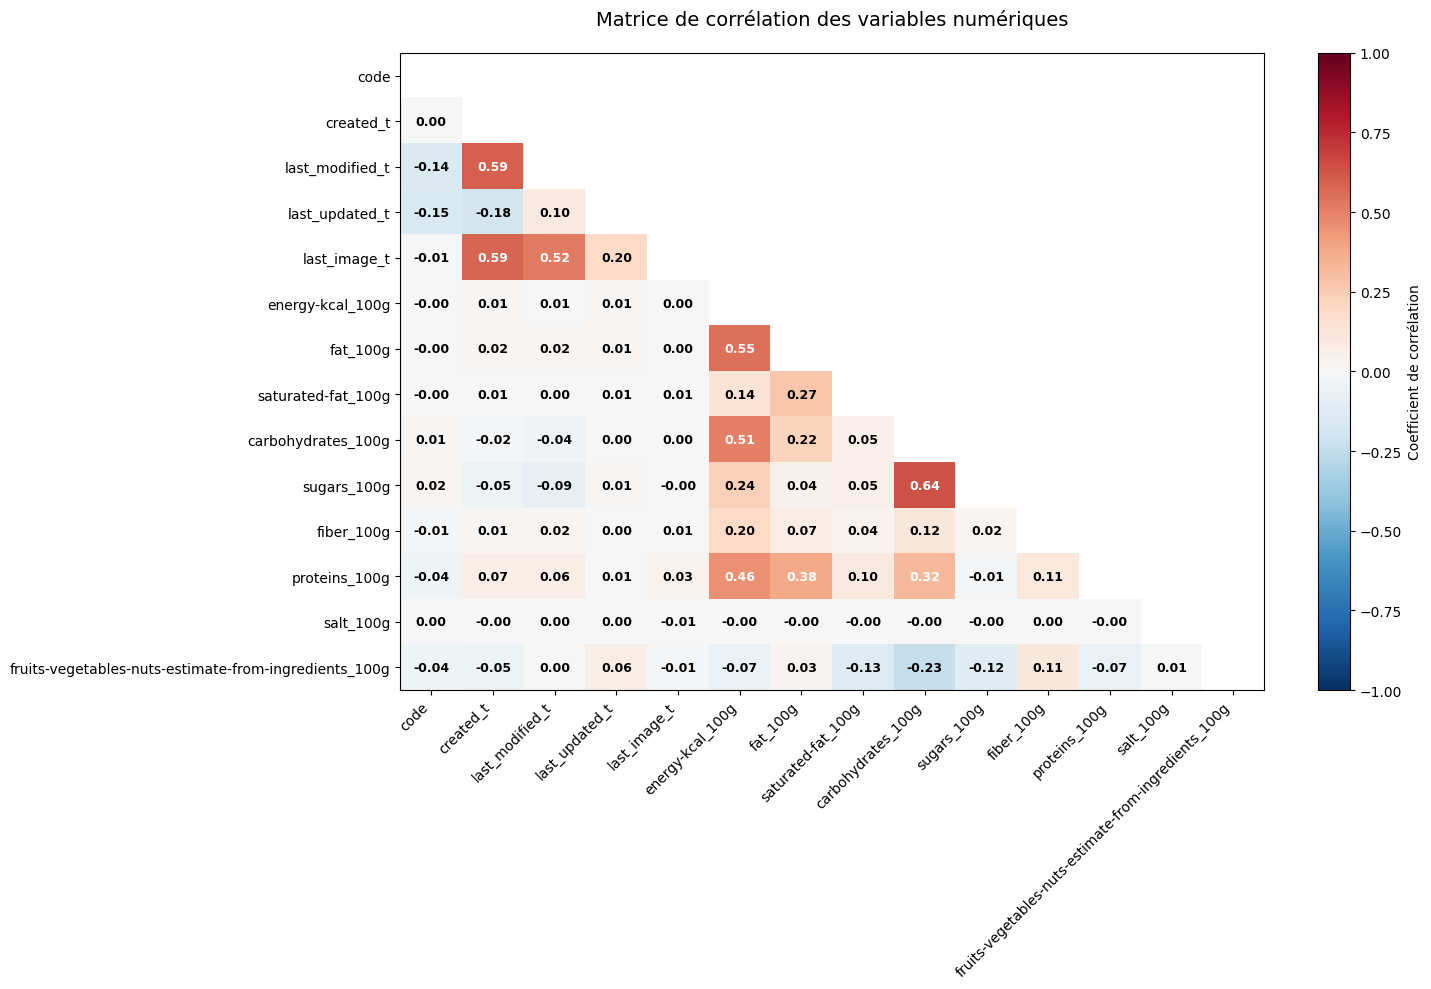

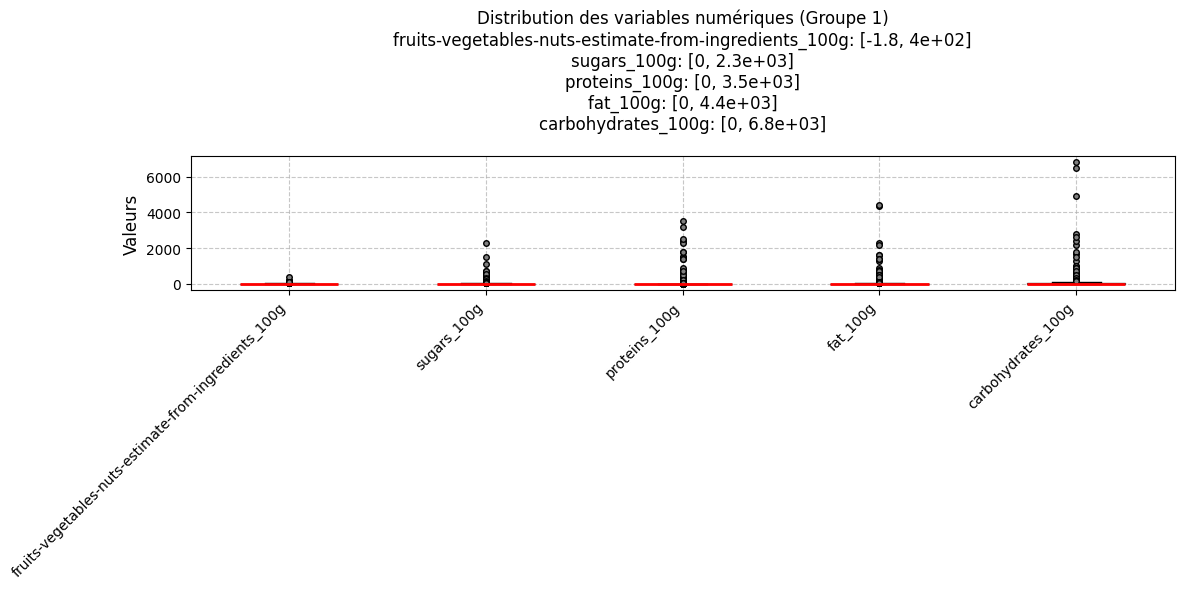


Statistiques détaillées pour le groupe 1

fruits-vegetables-nuts-estimate-from-ingredients_100g:
  Moyenne: 19
  Écart-type: 31
  Min: -1.8
  Max: 4e+02
  Nombre de valeurs non-nulles: 157485

sugars_100g:
  Moyenne: 15
  Écart-type: 22
  Min: 0
  Max: 2.3e+03
  Nombre de valeurs non-nulles: 246413

proteins_100g:
  Moyenne: 7.7
  Écart-type: 18
  Min: 0
  Max: 3.5e+03
  Nombre de valeurs non-nulles: 255808

fat_100g:
  Moyenne: 12
  Écart-type: 23
  Min: 0
  Max: 4.4e+03
  Nombre de valeurs non-nulles: 255403

carbohydrates_100g:
  Moyenne: 33
  Écart-type: 38
  Min: 0
  Max: 6.8e+03
  Nombre de valeurs non-nulles: 256433


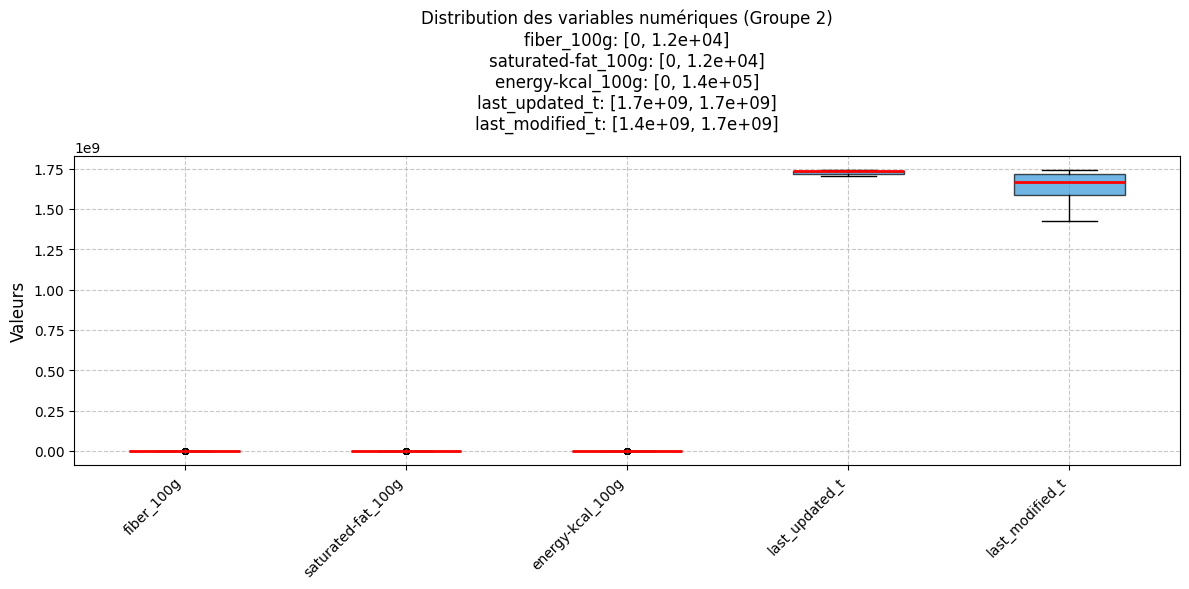


Statistiques détaillées pour le groupe 2

fiber_100g:
  Moyenne: 2.9
  Écart-type: 28
  Min: 0
  Max: 1.2e+04
  Nombre de valeurs non-nulles: 189807

saturated-fat_100g:
  Moyenne: 4.5
  Écart-type: 27
  Min: 0
  Max: 1.2e+04
  Nombre de valeurs non-nulles: 234514

energy-kcal_100g:
  Moyenne: 2.7e+02
  Écart-type: 4.1e+02
  Min: 0
  Max: 1.4e+05
  Nombre de valeurs non-nulles: 256829

last_updated_t:
  Moyenne: 1.7e+09
  Écart-type: 1.2e+07
  Min: 1.7e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 299999

last_modified_t:
  Moyenne: 1.7e+09
  Écart-type: 6e+07
  Min: 1.4e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 300000


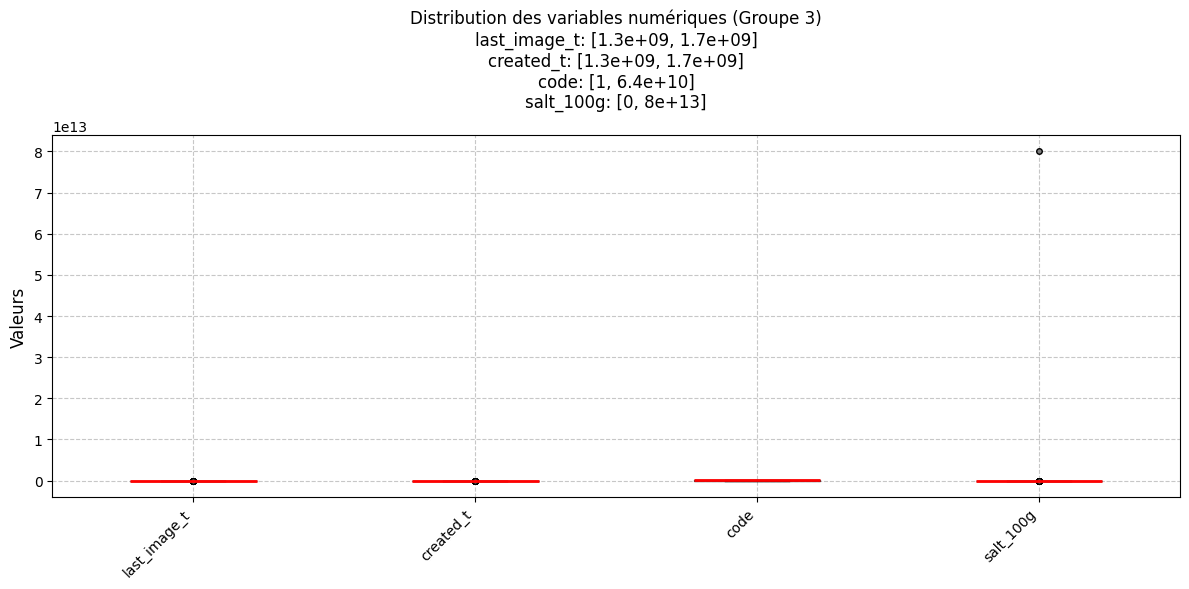


Statistiques détaillées pour le groupe 3

last_image_t:
  Moyenne: 1.7e+09
  Écart-type: 4.7e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 165086

created_t:
  Moyenne: 1.6e+09
  Écart-type: 7.8e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 300000

code:
  Moyenne: 3.2e+10
  Écart-type: 1.8e+10
  Min: 1
  Max: 6.4e+10
  Nombre de valeurs non-nulles: 300000

salt_100g:
  Moyenne: 3.4e+08
  Écart-type: 1.7e+11
  Min: 0
  Max: 8e+13
  Nombre de valeurs non-nulles: 232975

Résumé de la qualité des données:
Dimensions: 300000 lignes, 16 colonnes
Types de données: float64: 11, uint32: 2, uint64: 1, category: 1, category: 1
Colonnes avec valeurs manquantes: 13

Résumé des modifications :
Dimensions initiales : (300000, 206)
Dimensions finales : (300000, 16)

Colonnes conservées :
- code: uint64
- created_t: uint32
- last_modified_t: uint32
- last_updated_t: float64
- nutriscore_grade: category
- pnns_groups_1: category
- last_image_t: float64
- energy-

In [2]:
# Configuration des paramètres
params = {
    'max_categories': 30,
    'min_unique_ratio': 0.01,
    'missing_threshold': 0.5,
    'correlation_threshold': 0.7
}

# Application de la fonction
df_filtered, analysis_report = analyze_and_select_features(df, **params)

# Création du rapport de qualité
quality_report = analyze_data_quality(df_filtered)

# Visualisation des résultats essentiels
plot_data_quality_dashboard(df_filtered, quality_report)

# Afficher un résumé des modifications
print("\nRésumé des modifications :")
print(f"Dimensions initiales : {df.shape}")
print(f"Dimensions finales : {df_filtered.shape}")

# Afficher les colonnes restantes et leurs types
print("\nColonnes conservées :")
for col, dtype in df_filtered.dtypes.items():
    print(f"- {col}: {dtype}")